In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load dataset
df = pd.read_csv("C:/Users/Lenovo/Documents/221501118/Ex1/trends.csv")

# Display the first few rows of the dataframe
df.head()


,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


In [6]:
# Convert 'year' to datetime if it's not already in the correct format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Drop rows with missing values
df = df.dropna(subset=['year', 'rank'])

# Group the data by year and calculate the average rank for each year (if multiple entries per year)
df_grouped = df.groupby('year').agg({'rank': 'mean'}).reset_index()

# Display the cleaned dataset
df_grouped.head()


,year,rank
0,2001-01-01,3.0
1,2002-01-01,3.0
2,2003-01-01,3.0
3,2004-01-01,3.0
4,2005-01-01,3.0


In [13]:
# Convert 'year' to numerical values
df_grouped['year_numeric'] = df_grouped['year'].dt.year

# Define features (X) and target variable (y)
X = df_grouped[['year_numeric']]
y = df_grouped['rank']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


In [10]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0
R-squared: 1.0


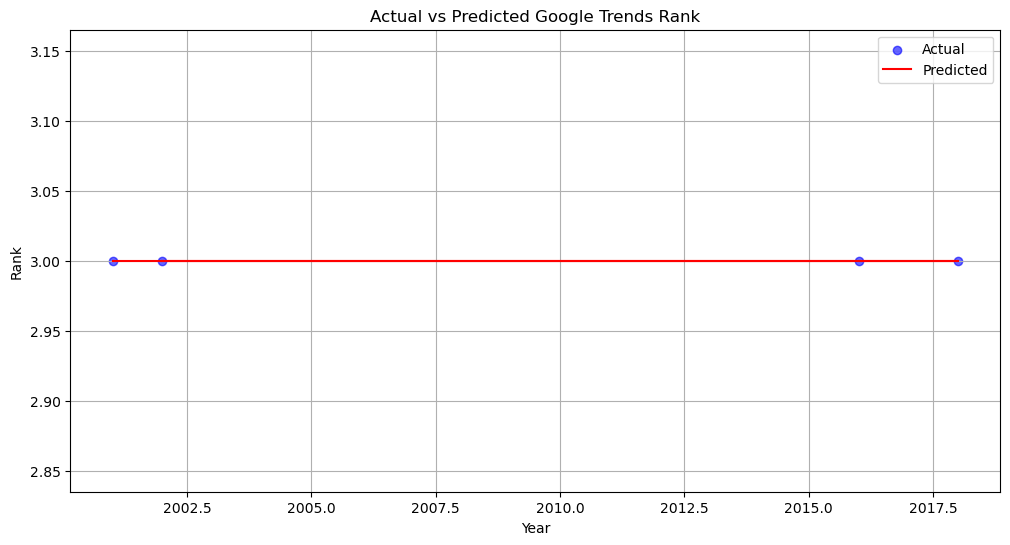

In [11]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Google Trends Rank')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Forecast for future years (for example, the next 5 years)
future_years = pd.DataFrame({'year_numeric': np.arange(2025, 2030)})

# Make predictions for the future years
future_predictions = model.predict(future_years)

# Display the forecasted values
future_years['Predicted Rank'] = future_predictions
print(future_years)


   year_numeric  Predicted Rank
0          2025             3.0
1          2026             3.0
2          2027             3.0
3          2028             3.0
4          2029             3.0
